In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.tree import export_graphviz

In [2]:
# Loading train and test set

with open('dataset_dict.pickle', 'rb') as file:
    loaded_data = pickle.load(file)

X_train_loaded = loaded_data["X_train"]
X_test_loaded = loaded_data["X_test"]
y_train_loaded = loaded_data["y_train"]
y_test_loaded = loaded_data["y_test"]

In [3]:
X_train_loaded.shape, X_test_loaded.shape

((6204669, 362), (1551168, 362))

In [4]:
y_train_loaded.shape, y_test_loaded.shape

((6204669,), (1551168,))

In [5]:
X_train_loaded.dtypes, X_test_loaded.dtypes

(YEAR              int16
 MONTH             int16
 DAY               int16
 DAY_OF_WEEK       int16
 DEPARTURE_TIME    int16
                   ...  
 IATA_CODE_WRG      bool
 IATA_CODE_WYS      bool
 IATA_CODE_XNA      bool
 IATA_CODE_YAK      bool
 IATA_CODE_YUM      bool
 Length: 362, dtype: object,
 YEAR              int16
 MONTH             int16
 DAY               int16
 DAY_OF_WEEK       int16
 DEPARTURE_TIME    int16
                   ...  
 IATA_CODE_WRG      bool
 IATA_CODE_WYS      bool
 IATA_CODE_XNA      bool
 IATA_CODE_YAK      bool
 IATA_CODE_YUM      bool
 Length: 362, dtype: object)

In [6]:
y_train_loaded.dtypes,y_test_loaded.dtypes

(dtype('int16'), dtype('int16'))

In [7]:
# Defining a Decisiontree Classifier model

Dt = DecisionTreeClassifier(max_depth = 2)

In [8]:
# Fitting Dt_pipeline

Dt.fit(X_train_loaded,y_train_loaded)

DecisionTreeClassifier(max_depth=2)

In [9]:
pred = Dt.predict(X_test_loaded)

In [10]:
pred_prob= Dt.predict_proba(X_test_loaded)

# Assessing Dt model

ac = accuracy_score(y_test_loaded, pred)

f1 = f1_score(y_test_loaded, pred, average='weighted')
cmd = confusion_matrix(y_test_loaded, pred)

print('Decision Tree: Accuracy=%.3f' % (ac))

print('Decision Tree: f1-score=%.3f' % (f1))

Decision Tree: Accuracy=1.000
Decision Tree: f1-score=1.000


[Text(0.5, 0.8333333333333334, 'x[14] <= 0.5\ngini = 0.023\nsamples = 6204669\nvalue = [6132291, 72378]'),
 Text(0.25, 0.5, 'x[9] <= 11.0\ngini = 0.001\nsamples = 71590\nvalue = [41, 71549]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 71549\nvalue = [0, 71549]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [41, 0]'),
 Text(0.75, 0.5, 'x[6] <= 0.5\ngini = 0.0\nsamples = 6133079\nvalue = [6132250, 829]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.183\nsamples = 8132\nvalue = [7303, 829]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 6124947\nvalue = [6124947, 0]')]

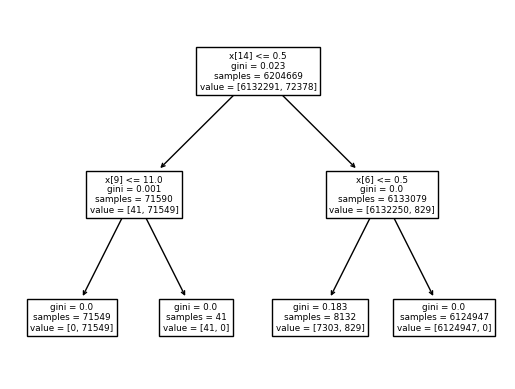

In [11]:
# Visualizing the decision tree

import graphviz.backend as be
from IPython.display import Image, display_svg, SVG
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plot_tree(Dt)

In [12]:
# Printing confusion matrix of Dt Model

print(cmd)

[[1533029       0]
 [    186   17953]]


In [13]:
# Printing Clasification report of Dt model

class_report = classification_report(y_test_loaded, pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1533029
           1       1.00      0.99      0.99     18139

    accuracy                           1.00   1551168
   macro avg       1.00      0.99      1.00   1551168
weighted avg       1.00      1.00      1.00   1551168



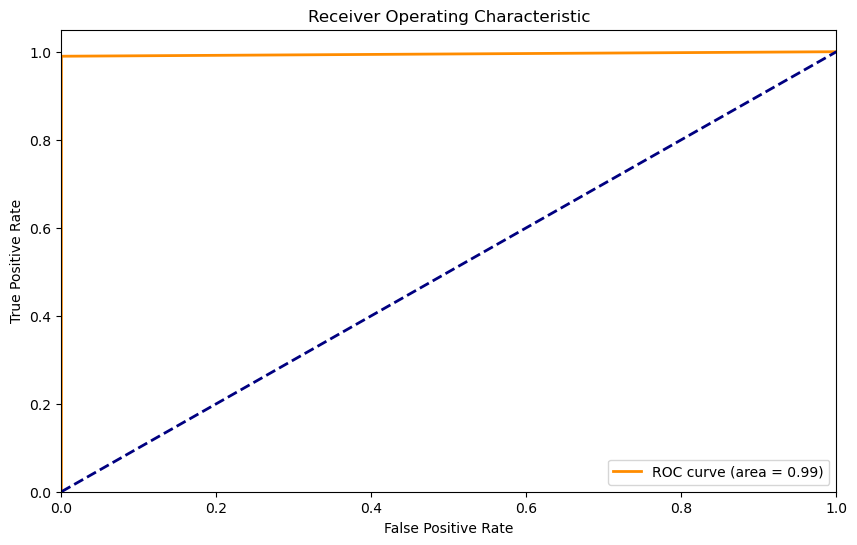

In [14]:
# ROC curve
y_score = Dt.predict_proba(X_test_loaded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_loaded, pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Defining RF model

RF= RandomForestClassifier(n_estimators = 8)

In [16]:
RF_MODEL= RF.fit(X_train_loaded,y_train_loaded)

In [17]:
y_pred = RF_MODEL.predict(X_test_loaded)
y_pred_prob = RF_MODEL.predict_proba(X_test_loaded)


# Assessing RF model

ac = accuracy_score(y_test_loaded, y_pred)

f1 = f1_score(y_test_loaded, y_pred, average='weighted')
cm = confusion_matrix(y_test_loaded, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=1.000
Random Forest: f1-score=1.000


In [18]:
# Printing RF confusion matrix

print(cm)

[[1533029       0]
 [     14   18125]]


In [19]:
# Printing Classification Report

class_report = classification_report(y_test_loaded, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1533029
           1       1.00      1.00      1.00     18139

    accuracy                           1.00   1551168
   macro avg       1.00      1.00      1.00   1551168
weighted avg       1.00      1.00      1.00   1551168



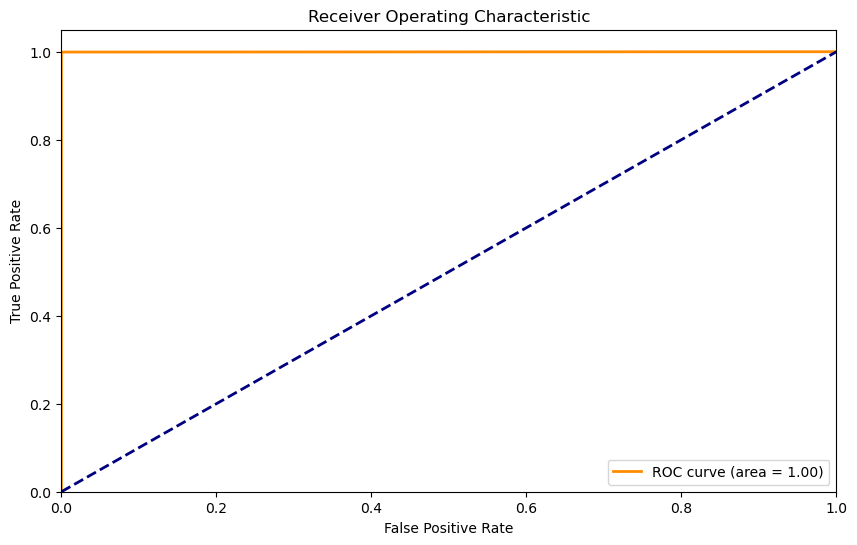

In [20]:
# Determining the Area under the curve.

y_score = RF_MODEL.predict_proba(X_test_loaded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_loaded, y_pred, pos_label= 1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

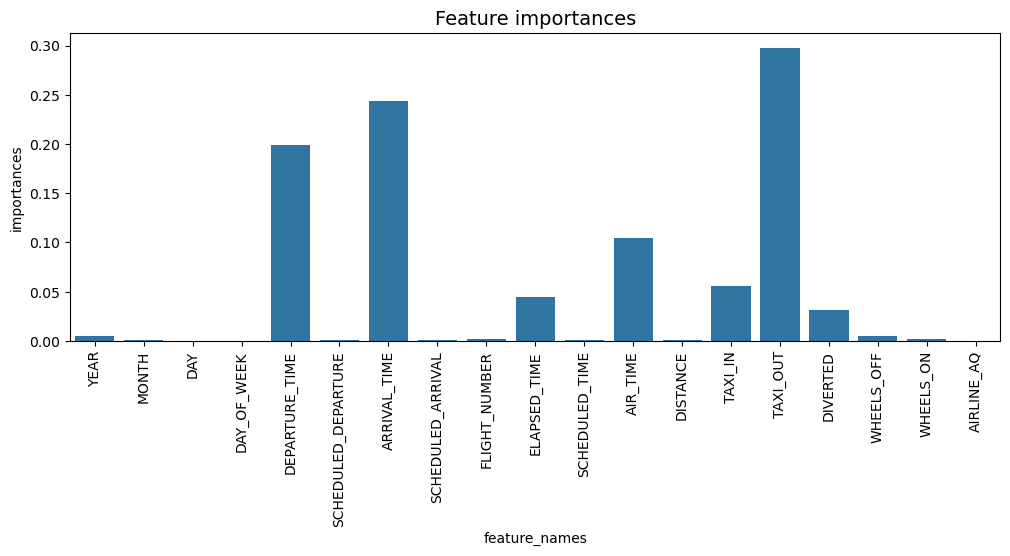

In [21]:
# Feature Importance
importances_df = pd.DataFrame({"feature_names" : RF_MODEL.feature_names_in_, 
                               "importances" : RF_MODEL.feature_importances_})
                             
# Plotting bar chart, g is from graph
plt.figure(figsize=(12, 4))
g = sns.barplot(x=importances_df["feature_names"][:19], 
                y=importances_df["importances"][:19])
plt.xticks(rotation=90)
g.set_title("Feature importances", fontsize=14);

Although the current state of the model is not bad, the inability of the model to correctly classify 19 training data correctly leading to false negatives proves that the model is not solving the issue of predicting flight cancellations in advance accurately. The model must therefore be improved.

In [22]:
# improving the model by creating an array of class probabilities called y_scores

y_scores = RF_MODEL.predict_proba(X_test_loaded)[:, 1]

In [23]:
# Generating a precision recall curve

p, r, thresholds = precision_recall_curve(y_test_loaded, y_scores)

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')

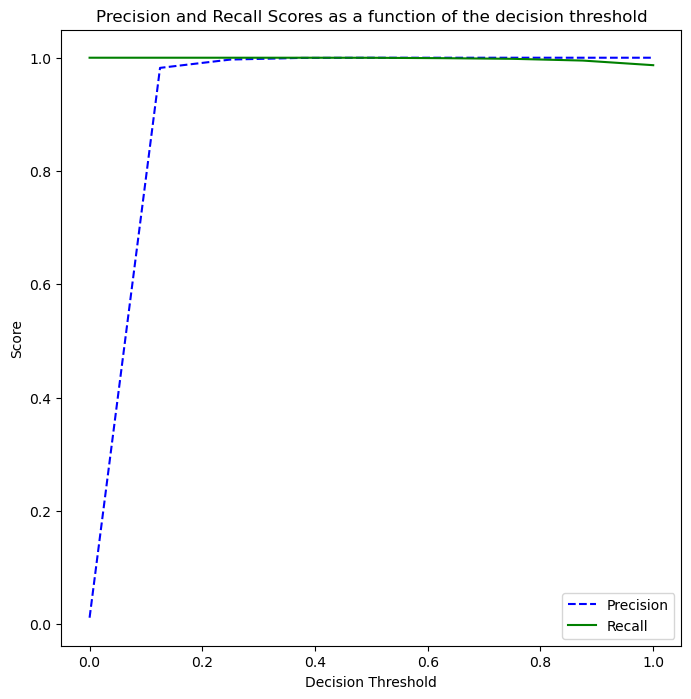

In [25]:
plot_precision_recall_vs_threshold(p, r, thresholds)

In [26]:
def adjusted_classes(y_scores, t):
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test_loaded, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

     pred_neg  pred_pos
neg   1533023         6
pos         0     18139


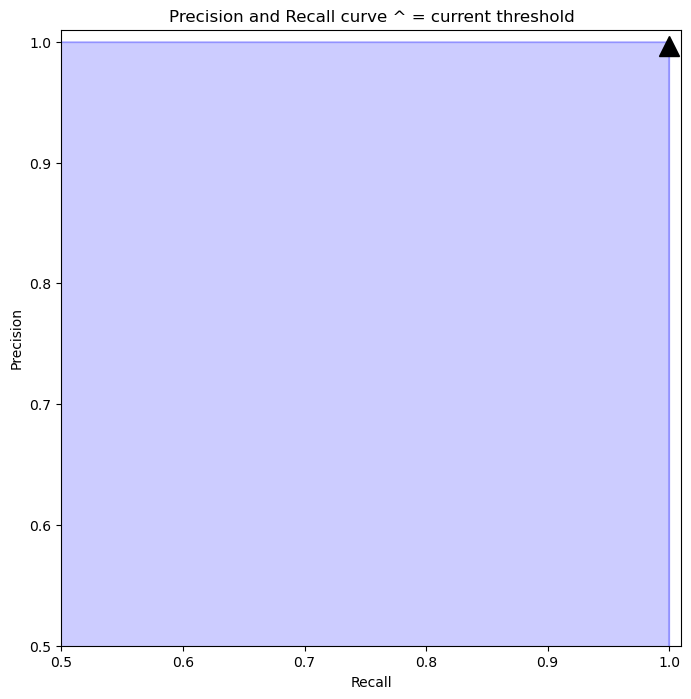

In [27]:
# new confusion matrix after reducing threshold to 0.3

precision_recall_threshold(p, r, thresholds, 0.3)

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

0.9999999997842317


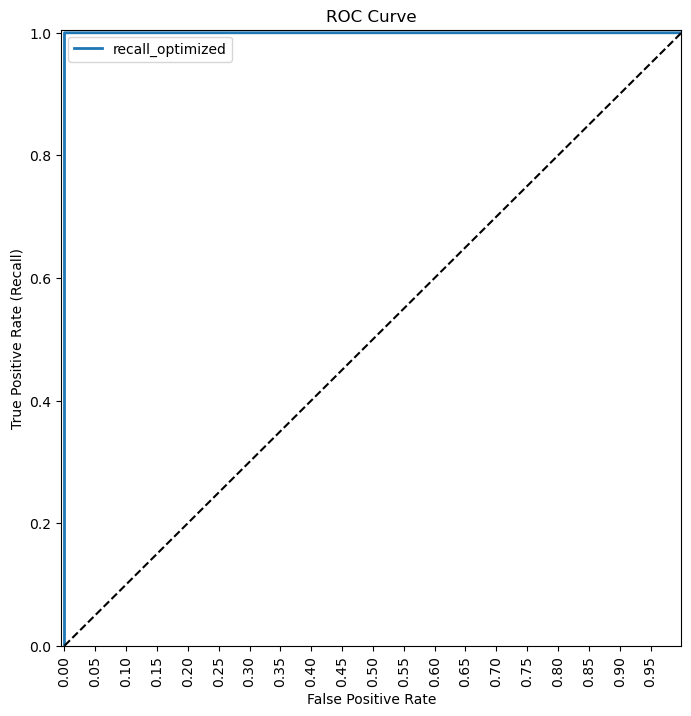

In [29]:
# New ROC curve for improved model

fpr, tpr, auc_thresholds = roc_curve(y_test_loaded, y_scores)
print(auc(fpr, tpr)) # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

** Summary**

The first model created to predict flight cancelllation was Linear Regression model.Evaluating the performance of this model showed an r-squared score of 0.6412570250364651 and a mean absolute error of 0.032264605 as well as a mean squared error of 0.064389445.

The second model was a decision tree regressor with maximum depth of 2. The r-squared score of this model was 0.9905311145772324 which indicates that accuracy of the prediction of this model is better than the Linear model. The mean absolute error was 0.00022682374594513373 and the mean squared error was also  0.010460981871702324 which are smaller than the previous model.

The third model was a random forest classifier model. It has n_estimators parameter set at 8. The accuracy of this model was 1 and the f1-score was 1.From the confusion matrix and the classification report it is clear that there is class imbalance however thr precision and recall scores are good which further proves that the model is performing well.The ROC curve further shows the diagnostic ability of the model. With the area under the curve value of 1, the model is able to rank a randomly positive instance higher than a randomly negative instance.The most imporatnt feature of this model is the taxi out, elapsed time and arrival time features.

Of these three models, the Random Forest model performed the best.